<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для воспроизводимости результатов. Число рандомное, так что оно должно быть одинаковым у меня и у проверяющего для получения одинакового результата при запусках. По идее так :)

P.S. Я везде дальше в коде буду делать много пометок, чтобы не запутаться самой и лучше разобраться (потому что я полный 0 пока что в мл) и чтобы проверять было удобнее.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
df_train.sample(30, random_state=42) # 30 случайных строк
display(df_test.head(5), df_test.tail(5)) # первые и последние 5 объектов

omissions = df_train.columns[df_train.isna().any()] # смотрим наличие пропусков
print('Колонки с пропусками:', list(omissions)) 

duplicates = df_train.duplicated().any() # ищем дубликаты
print('Наличие дубликатов:', duplicates) 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Колонки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Наличие дубликатов: True


Выводы: можно увидеть структуру данных таблицы, названия колонок и их количество, типы фичей, возможные пропуски. Нельзя делать выводы о закономерностях, выбросах в целом, редких значениях, так как строчек маловато.

Нет, просто метода duplicated явно недостаточно, потому что он находит только полностью одинаковые строчки по всем столбцам, а на практике встречаются частичные дубликаты, один и тот же объект с разными значениями. В общем нужны дополнительные проверки. 

In [ ]:
# ни разу не строила такое, поэтому обратилась на всякий случай к ChatGPT для перепроверки себя и консультации

from ydata_profiling import ProfileReport # берем из библиотеки конкретный объект
profile = ProfileReport(df_train, title='Cars train data report', explorative=True) # создаем отчет-объект на основании данных df_train
profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [6]:
num_cols = df_train.select_dtypes(include='number').columns # выбираем только числовые столбцы
cols_with_na = num_cols[df_train[num_cols].isna().any()] # оставляем только столбцы с пропусками
print(cols_with_na) # для понимания, какие конкретно колонки заполнять будем

median_values = df_train[cols_with_na].median() # считаем медианы по трейну
df_train[cols_with_na] = df_train[cols_with_na].fillna(median_values) # заполняем пропуски в трейне
df_test[cols_with_na] = df_test[cols_with_na].fillna(median_values) # заполняем пропуски в тесте

print(df_train[cols_with_na].isna().sum()) # проверка пропусков в трейне
print(df_test[cols_with_na].isna().sum()) # проверка пропусков в тесте

Index(['seats'], dtype='object')
seats    0
dtype: int64
seats    0
dtype: int64


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частичным. Например, объект мог быть внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
feature_cols = df_train.columns.drop('selling_price') # исключаем целевую переменную, остальные фичи берем
dup_mask = df_train.duplicated(subset=feature_cols, keep=False) # булева маска, True у строчек, фичи которых совпадают с кем-то еще
dup_count = dup_mask.sum() # считаем строчки с совпадающими фичами
print('Число объектов с одинаковыми фичами:', dup_count)

df_train[dup_mask] # отображаем объекты с одинаковыми фичами

df_train = df_train.drop_duplicates(subset=feature_cols, keep='first') # удаляем повторяющиеся строчки по фичам + первую оставляем
df_train = df_train.reset_index(drop=True) # обновляем индексы

Число объектов с одинаковыми фичами: 1799


In [8]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [9]:
cols_to_clean = ['mileage', 'engine', 'max_power'] # обозначаем столбцы для очистки единиц измерения

for df in (df_train, df_test): # цикл для обработки трейна и теста
    for col in cols_to_clean:
        df[col] = df[col].str.extract(r'(\d+\.?\d*)')[0].astype(float) # берем только числовую часть строки и приводим ее к float
    df.drop(columns=['torque'], inplace=True) # удаляем столбец torque

print(df_train[cols_to_clean].dtypes) # проверка типов данных на всякий случай для трейна 
print(df_test[cols_to_clean].dtypes) # и такая же для теста


mileage      float64
engine       float64
max_power    float64
dtype: object
mileage      float64
engine       float64
max_power    float64
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

При попытке запустить код к 4 заданию, pandas, по всей видимости, не смог заполнить NaN, которые возникли при очистке колонок в предыдущем задании. Так что разбиваю на несколько ячеек код, чтобы отловить возможные ошибки сразу и все же преобразовать столбцы к интам.

In [10]:
# смотрим, где и сколько пропусков появилось после очистки
print(df_train[['engine', 'seats']].isna().sum()) 
print(df_test[['engine', 'seats']].isna().sum()) 

engine    186
seats       0
dtype: int64
engine    19
seats      0
dtype: int64


In [11]:
# считаем медианы по трейну
engine_med = df_train['engine'].median()
seats_med = df_train['seats'].median()

# заполняем NaN и приводим engine с seats к интовому значению в трейне и тесте
for df in (df_train, df_test):
    df['engine'] = df['engine'].fillna(engine_med).astype('int64')
    df['seats'] = df['seats'].fillna(seats_med).astype('int64')

In [12]:
# здесь просто проверю, что все выполнилось
print(df_train[['engine', 'seats']].isna().sum())
print(df_test[['engine', 'seats']].isna().sum())

print(df_train[['engine', 'seats']].dtypes)
print(df_test[['engine', 'seats']].dtypes)


engine    0
seats     0
dtype: int64
engine    0
seats     0
dtype: int64
engine    int64
seats     int64
dtype: object
engine    int64
seats     int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [13]:
print('Числовые признаки по трейну:')
print(df_train.describe(include='number'))

print('Числовые признаки по тесту:')
print(df_test.describe(include='number'))

print('Категориальные признаки по трейну:')
print(df_train.describe(include='object'))

print('Категориальные признаки по тесту')
print(df_test.describe(include='object'))

Числовые признаки по трейну:
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.432842  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.051002   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5656.000000  5840.000000  
mean     88.103070     5.426712  
std      32.131943     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%     100.000000     5.000000  
max  

Вывод: после заполнения пропусков медианами распределения числовых фичей в трейне и тесте стали сопоставимыми: диапазоны значений и медианы близки, сильных сдвигов не видно. Целевая переменная selling_price имеет большой размах, а так же среднее заметно больше медианы (это, по идее, говорит о правосторонней асимметрии распределения). Для категориальных признаков количество уникальных значений и наиболее частые категории в трейне и тесте похожи.

In [14]:
print(df_train.shape)
print(df_train.columns)

(5840, 12)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


In [15]:
assert df_train.shape == (5840, 12) # 13 исправила на 12, так как в чате Сабрина сказала, что тут 12 и должно быть с учетом того, что мы убрали torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

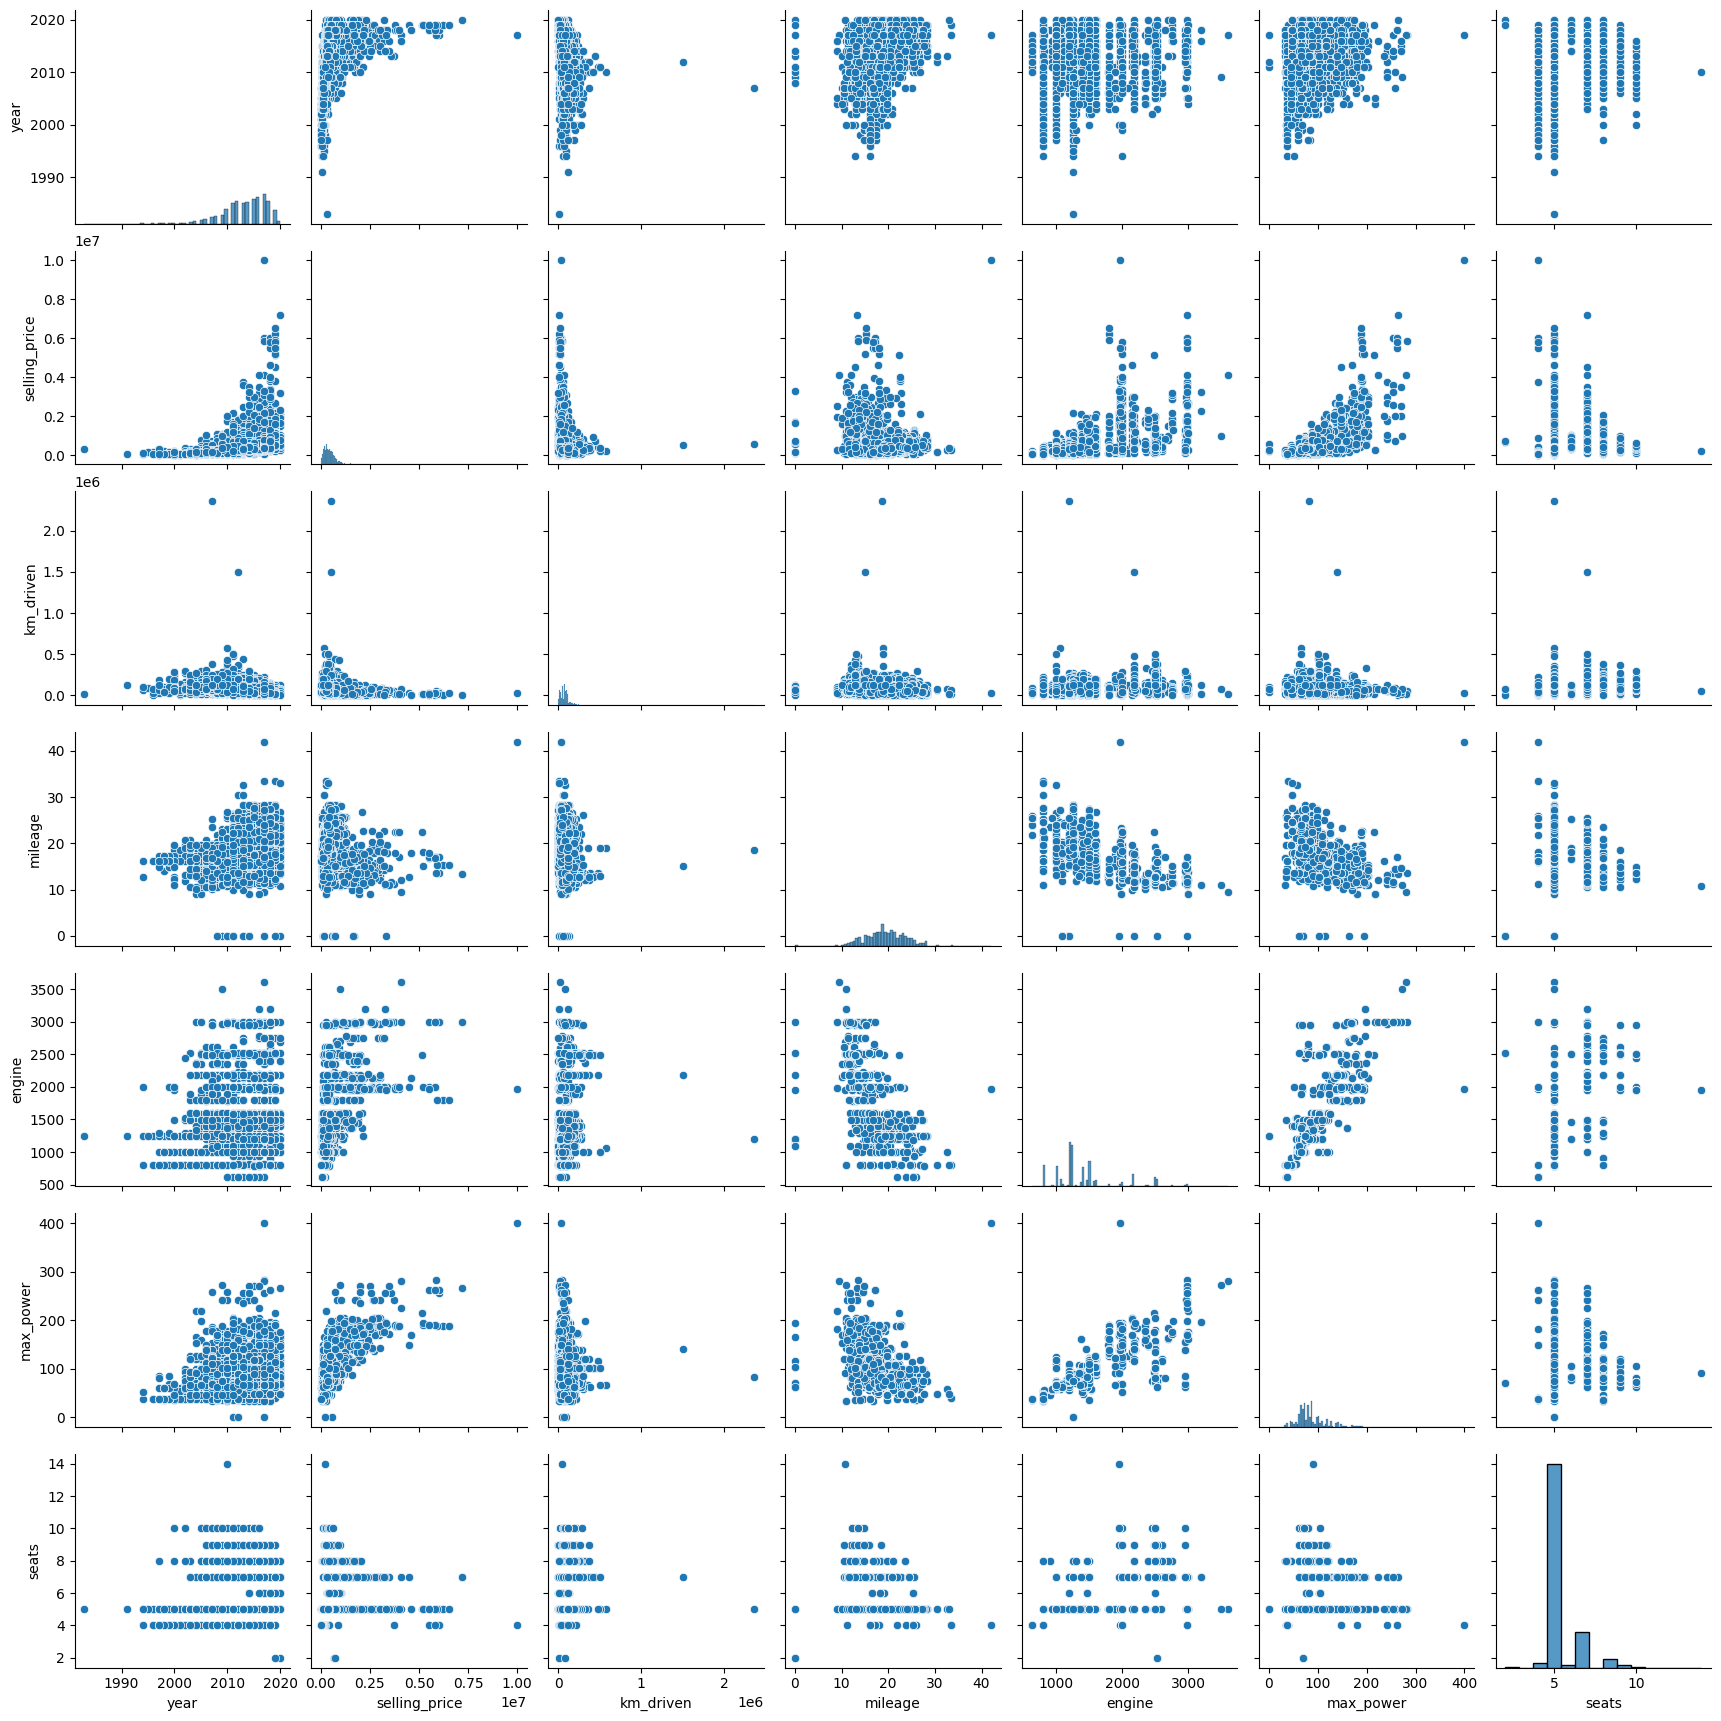

In [ ]:
num_cols = df_train.select_dtypes(include='number').columns
sns.pairplot(df_train[num_cols])
plt.show()

По распределениям можно проследить, что selling price растет с увеличением year (новые машины дороже), снижается при росте km_driven (больше пробег - меньше цена), имеет положительную связь с engine и max_power (более мощные и объемные машины дороже). С признаком seats явной зависимости нет.

Корреляции между признаками:
- отрицательная:
    year и km_driven, 
    engine и mileage
- положительная:
    engine и max_power
    

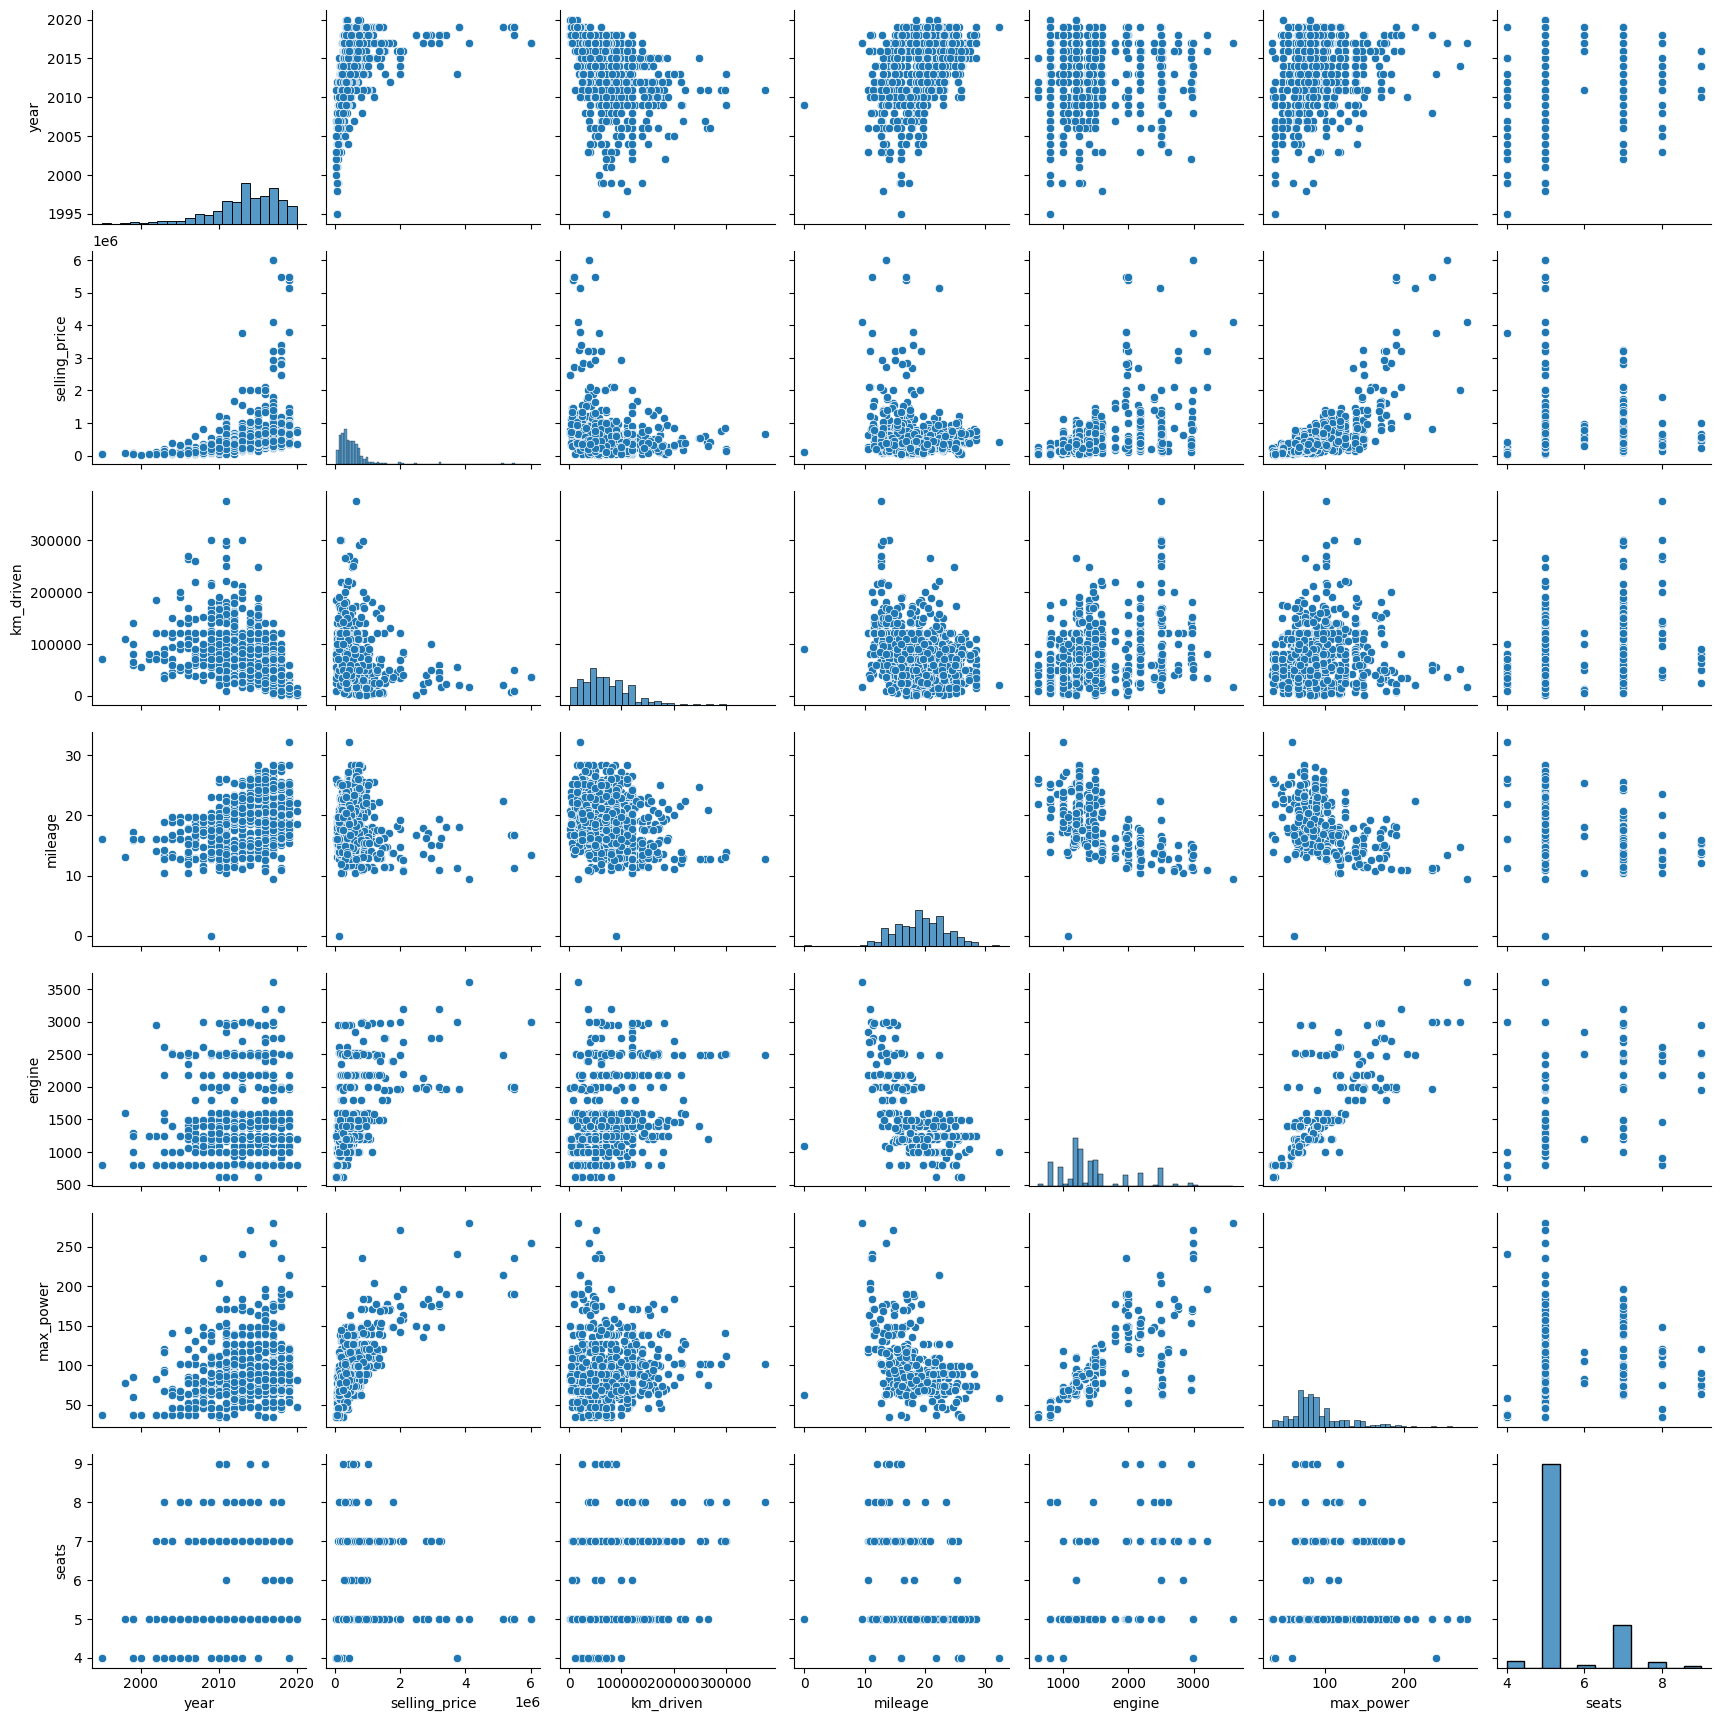

In [ ]:
num_cols_test = df_test.select_dtypes(include='number').columns
sns.pairplot(df_test[num_cols_test])
plt.show()

Есть визуальная схожесть трейна и теста, облака точек и формы диаграмм имеют схожие черты, сильно выбивающихся визуально смещений нет. Различия, возможно, в меньшем размере выборки. 

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


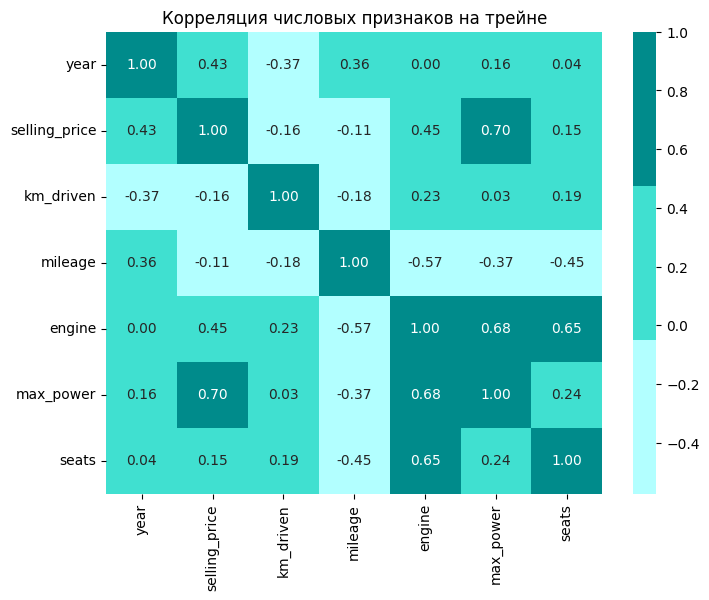

In [ ]:
num_cols = df_train.select_dtypes(include='number').columns # берем только числовые признаки трейна
corr_matrix = df_train[num_cols].corr() # матрица корреляций Пирсона

# тепловая карта корреляций в моих любимых оттенках ^_^
special_map = sns.color_palette(
    ['#B2FFFF',
     '#40E0D0',
     '#008B8B'],
    as_cmap=True
)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=special_map) 
plt.title('Корреляция числовых признаков на трейне')
plt.show()


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Наименее скоррелированы между собой year и engine (смотрим по модулю)
- Наиболее скоррелированы selling_price и max_power, а так же engine и max_power
- В целом да, тенденция есть, но не прям линейная 

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

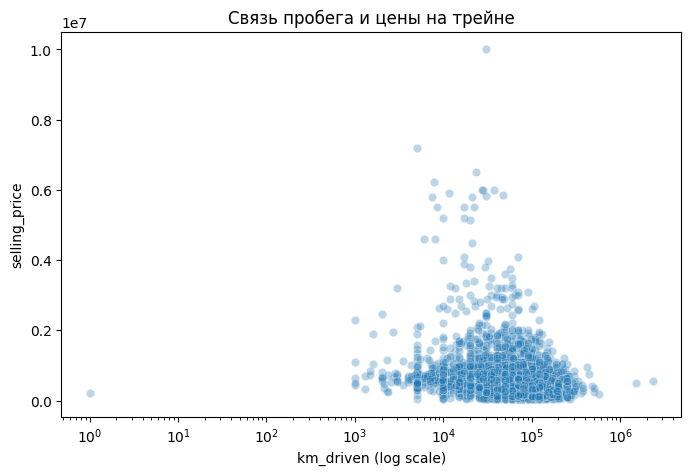

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_train,
    x='km_driven',
    y='selling_price',
    alpha=0.3
)

plt.xscale('log') # пробег в log-шкале, чтобы не слипалось визуально мне подсказал сделать ChatGPT
plt.xlabel('km_driven (log scale)')
plt.ylabel('selling_price')
plt.title('Связь пробега и цены на трейне')
plt.show()

На графике видно, что при небольшом пробеге цена в среднем выше, а с ростом пробега плотность точек смещается к более низким значениям цены. При этом разброс цен все еще большой, так как есть много других факторов. Логично, что пробег связан со стоимостью, но все же :)

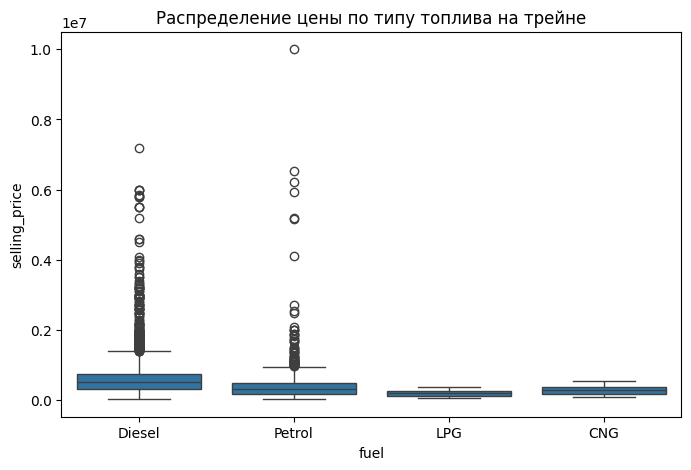

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_train,
    x='fuel',
    y='selling_price'
)

plt.xlabel('fuel')
plt.ylabel('selling_price')
plt.title('Распределение цены по типу топлива на трейне')
plt.xticks(rotation=0)
plt.show()

Распределения цены для разных типов топлива отличаются. Тип топлива влияет на стоимость автомобиля, так как у некоторых категорий медиана заметно выше, у других - ниже, а разброс цен может быть шире или уже. В целом, модель может использовать этот фич для улучшения качества предсказаний. 

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Они уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

Откуда-то вылезли новые пропуски при запуске обучения, поэтому для начала обработаю их здесь перед повторным запуском. 

In [16]:
mileage_med = df_train['mileage'].median()
max_power_med = df_train['max_power'].median()

for df in (df_train, df_test):
    df['mileage'] = df['mileage'].fillna(mileage_med)
    df['max_power'] = df['max_power'].fillna(max_power_med)

In [17]:
target = 'selling_price'

train_num = df_train.select_dtypes(include='number').copy() # берем датафрейм только с числовыми типами данных, создаем копию
y_train = train_num[target]
x_train = train_num.drop(columns=[target])

In [18]:
x_train.columns # просто для наглядности

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

**Описание признаков:**

year - год выпуска автомобиля

km_driven - пробег

mileage - расход топлива

engine - объем двигателя

max_power - максимальная мощность двигателя

seats - количество мест в машине

In [19]:
test_num = df_test.select_dtypes(include='number').copy()
y_test = test_num[target]
x_test = test_num.drop(columns=[target])

In [20]:
x_train.isna().sum()

year         0
km_driven    0
mileage      0
engine       0
max_power    0
seats        0
dtype: int64

Пропусков по нулям - приступаем к обучению.

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression() # создаем модель линейной регрессии
linreg.fit(x_train, y_train) # обучаем модель на трейне

# предсказания для трейна и теста
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# метрики для трейна
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# метрики для теста
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print('R2 train:', r2_train)
print('MSE train:', mse_train)
print('R2 test:', r2_test)
print('MSE test:', mse_test)

R2 train: 0.5922591702157309
MSE train: 116874153930.02876
R2 test: 0.594141979478839
MSE test: 233298779730.45712


**Выводы:**

То, что модель на вещественных признаках объясняет 59% вариации цены по идее значит, что она в целом не плохая, но и не идеальная. Она много чего не учитывает, так как мы использовали только числовые данные. Трейн и тест близки по r2 => нет сильного переобучения, качество примерно одинаковое на трейне и тесте. MSE на трейне меньше MSE на тесте => на тех данных, на которых обучалась модель, результат будет чуть лучше, это ожидаемо.  

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [22]:
from sklearn.preprocessing import StandardScaler

# создаем объект стандартизатора
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) # обучаем стандартизатор на трейне и масштабируем
x_test_scaled = scaler.transform(x_test) # к тесту применяем обученный стандартизатор


Посмотрим, как улучшилась модель.

In [23]:
linreg_scaled = LinearRegression()
linreg_scaled.fit(x_train_scaled, y_train)

r2_train_scaled = linreg_scaled.score(x_train_scaled, y_train)
r2_test_scaled = linreg_scaled.score(x_test_scaled, y_test)

mse_train_scaled = MSE(y_train, linreg_scaled.predict(x_train_scaled))
mse_test_scaled = MSE(y_test, linreg_scaled.predict(x_test_scaled))

print('R2 train (scaled):', r2_train_scaled)
print('MSE train (scaled):', mse_train_scaled)
print('R2 test (scaled):', r2_test_scaled)
print('MSE test (scaled):', mse_test_scaled)

R2 train (scaled): 0.5922591702157305
MSE train (scaled): 116874153930.0289
R2 test (scaled): 0.5941419794788517
MSE test (scaled): 233298779730.44977


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [24]:
coef_series = pd.Series(linreg_scaled.coef_, index=x_train.columns)
coef_series.abs().sort_values(ascending=False) # сортировка модулей

max_power    322807.353259
year         152772.570846
engine        61178.494337
km_driven     44158.818520
mileage       28833.925778
seats         23209.132486
dtype: float64

Наиболее информативый признак - max_power. Его изменения сильнее всего влияют на предсказание цены моделью.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE

# обучаем Lasso на нормализованных признаках
lasso = Lasso()  # параметры по умолчанию
lasso.fit(x_train_scaled, y_train)

# предсказания
y_train_pred_lasso = lasso.predict(x_train_scaled)
y_test_pred_lasso = lasso.predict(x_test_scaled)

# метрики
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)

r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print('R2 train (Lasso):', r2_train_lasso)
print('MSE train (Lasso):', mse_train_lasso)
print('R2 test  (Lasso):', r2_test_lasso)
print('MSE test (Lasso):', mse_test_lasso)


R2 train (Lasso): 0.5922591701804456
MSE train (Lasso): 116874153940.1429
R2 test  (Lasso): 0.5941408124026637
MSE test (Lasso): 233299450599.16928


In [26]:
# смотрим на коэффициенты, считаем нулевые
print('Коэффициенты Lasso:', lasso.coef_)

zeros = (lasso.coef_ == 0).sum()
print('Количество нулевых коэффициентов:', zeros)
print('Всего признаков:', len(lasso.coef_))

Коэффициенты Lasso: [152772.3902142  -44157.68985794  28832.04339588  61173.66240922
 322808.23691947 -23206.25564908]
Количество нулевых коэффициентов: 0
Всего признаков: 6


MSE и r2 для Lasso почти такие же, как для обыной линейной регрессии. Количество нулевых коэффициентов 0 => L1 регуляризация с параметрами по умолчанию не занулила ни один вес. Возможно, модель не обнуляет коэффициенты, потому что они все полезные. 

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [27]:
from sklearn.model_selection import GridSearchCV

# сетка по параметру регуляризации alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# базовая модель Lasso
lasso = Lasso(max_iter=10000)  # побольше итераций, чтобы наверняка сошлось

# грид серч с 10-фолдовой кросс-валидацией
grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring='r2'
)

# обучаем грид серч на трейне
grid.fit(x_train_scaled, y_train)

# лучшая модель после перебора
best_lasso = grid.best_estimator_

print('Лучшие параметры:', grid.best_params_)
print('Лучший средний R2 по CV:', grid.best_score_)

# оцениваем лучшую модель на трейне и тесте
y_train_pred_gs = best_lasso.predict(x_train_scaled)
y_test_pred_gs = best_lasso.predict(x_test_scaled)

print('R2 train (best Lasso):', r2_score(y_train, y_train_pred_gs))
print('MSE train (best Lasso):', MSE(y_train, y_train_pred_gs))
print('R2 test  (best Lasso):', r2_score(y_test, y_test_pred_gs))
print('MSE test  (best Lasso):', MSE(y_test, y_test_pred_gs))

Лучшие параметры: {'alpha': 10}
Лучший средний R2 по CV: 0.5681522123461842
R2 train (best Lasso): 0.5922591666898702
MSE train (best Lasso): 116874154940.6756
R2 test  (best Lasso): 0.5941302904494412
MSE test  (best Lasso): 233305498918.34268


In [28]:
# считаем количество моделей, обученных грид-серчем
n_models = len(param_grid['alpha']) * 10

coefs = best_lasso.coef_
num_zeros = (coefs == 0).sum()

print('Количество моделей, обученных грид серчем:', n_models)
print('Лучший коэффициент регуляризации alpha:', best_lasso.alpha)
print('Коэффициенты лучшей модели:', coefs)
print('Количество нулевых коэффициентов:', num_zeros)
print('Всего коэффициентов:', len(coefs))


Количество моделей, обученных грид серчем: 50
Лучший коэффициент регуляризации alpha: 10
Коэффициенты лучшей модели: [152770.45018468 -44147.60879979  28815.43484952  61130.13080678
 322816.34534629 -23180.19532462]
Количество нулевых коэффициентов: 0
Всего коэффициентов: 6


Грид серч обучил 50 моделей. Лучший коэффициент регуляризации - 10. При таком значении L1 не занулила ни один из весов. 

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [29]:
from sklearn.linear_model import ElasticNet

# сетка гиперпараметров для ElasticNet
param_grid_enet = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# базовая модель ElasticNet
enet = ElasticNet(max_iter=10000)

# грид серч с 10-фолдовой кросс-валидацией
grid_enet = GridSearchCV(
    estimator=enet,
    param_grid=param_grid_enet,
    cv=10,
    scoring='r2'
)

# обучаем грид серч на трейне
grid_enet.fit(x_train_scaled, y_train)

# лучшая модель
best_enet = grid_enet.best_estimator_

print('Лучшие параметры ElasticNet:', grid_enet.best_params_)
print('Лучший средний R2 по CV:', grid_enet.best_score_)

# качество лучшей модели на трейне и тесте
y_train_pred_enet = best_enet.predict(x_train_scaled)
y_test_pred_enet = best_enet.predict(x_test_scaled)

print('R2 train (best ElasticNet):', r2_score(y_train, y_train_pred_enet))
print('MSE train (best ElasticNet):', MSE(y_train, y_train_pred_enet))
print('R2 test  (best ElasticNet):', r2_score(y_test, y_test_pred_enet))
print('MSE test  (best ElasticNet):', MSE(y_test, y_test_pred_enet))

# количество значений alpha × количество значений l1_ratio × 10 фолдов
n_models_enet = len(param_grid_enet['alpha']) * len(param_grid_enet['l1_ratio']) * 10
print('Количество моделей, обученных грид серчем:', n_models_enet)

Лучшие параметры ElasticNet: {'alpha': 1, 'l1_ratio': 0.9}
Лучший средний R2 по CV: 0.5761314666976897
R2 train (best ElasticNet): 0.5883542910912491
MSE train (best ElasticNet): 117993441993.7586
R2 test  (best ElasticNet): 0.5722296793169415
MSE test  (best ElasticNet): 245894595583.2367
Количество моделей, обученных грид серчем: 150


Грид серч обучил 150 моделей. Лучшие гиперпараметры: alpha 1, L1_ratio 0.9.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [30]:
# смотрим только категориальные признаки в трейне
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
print('Категориальные столбцы в df_train:')
print(cat_cols)

Категориальные столбцы в df_train:
['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [31]:
# создаем датафреймы с категориальными признаками 
x_train_cat = df_train[cat_cols].copy()
x_test_cat = df_train[cat_cols].copy()

In [32]:
# удаляем name из датафреймов
x_train_cat = x_train_cat.drop(columns=['name'])
x_test_cat = x_test_cat.drop(columns=['name'])

In [33]:
# просто проверка, что все удалилось
x_train_cat = x_train_cat.select_dtypes(include='object').columns.tolist()
print(x_train_cat)

['fuel', 'seller_type', 'transmission', 'owner']


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

Чтобы ячейки запускались логично и последовательно, вернем обратно name.

In [34]:
cat_cols = df_train.select_dtypes(include='object').columns.tolist()
print(cat_cols)

x_train_cat = df_train[cat_cols].copy()
x_test_cat = df_test[cat_cols].copy()

['name', 'fuel', 'seller_type', 'transmission', 'owner']


**Предобработка name**

In [35]:
# выделяем марку как первое слово в названии
x_train_cat['brand'] = x_train_cat['name'].str.split().str[0]
x_test_cat['brand']  = x_test_cat['name'].str.split().str[0]

# удаляем столбец name
x_train_cat = x_train_cat.drop(columns=['name'])
x_test_cat  = x_test_cat.drop(columns=['name'])


In [36]:
# assert x_train_cat.shape == (5840, 10)

In [37]:
x_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brand
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [38]:
from sklearn.preprocessing import OneHotEncoder

# к категориальным фичам добавляем seats
x_train_cat_seats = x_train_cat.join(df_train[['seats']])
x_test_cat_seats  = x_test_cat.join(df_test[['seats']])

# создаём one-hot-энкодер
ohe = OneHotEncoder(
    drop='first',              # выбрасываем по одному столбцу на признак
    handle_unknown='ignore',   # игнорируем новые категории на тесте
    sparse_output=False        # вернуть обычный numpy-массив
)

# обучаем на трейне
ohe.fit(x_train_cat_seats)

# кодируем трейн и тест
x_train_cat_ohe = ohe.transform(x_train_cat_seats)
x_test_cat_ohe  = ohe.transform(x_test_cat_seats)

# имена фичей
cat_feature_names = ohe.get_feature_names_out(x_train_cat_seats.columns)

# ChatGPT посоветовал превратить в DataFrame (удобнее дальше склеивать с числовыми признаками)
x_train_cat_ohe = pd.DataFrame(
    x_train_cat_ohe,
    columns=cat_feature_names,
    index=df_train.index
)

x_test_cat_ohe = pd.DataFrame(
    x_test_cat_ohe,
    columns=cat_feature_names,
    index=df_test.index
)

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
print(x_train_cat_ohe.shape)
print(x_test_cat_ohe.shape)

(5840, 47)
(1000, 47)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# склеиваем числовые и ohe-признаки
x_train_full = np.hstack([x_train_scaled, x_train_cat_ohe.values])
x_test_full  = np.hstack([x_test_scaled,  x_test_cat_ohe.values])

# задаем модель Ridge и сетку по alpha
ridge = Ridge()  # модель гребневой регрессии

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]   # простая сетка по регуляризации
}

# GridSearchCV с 10-кратной кросс-валидацией и метрикой R2
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_ridge.fit(x_train_full, y_train)

best_ridge = grid_ridge.best_estimator_
print('Лучший alpha:', grid_ridge.best_params_['alpha'])
print('Лучший средний R2 по CV:', grid_ridge.best_score_)

# считаем R2 на трейне и тесте для лучшей модели
y_train_pred = best_ridge.predict(x_train_full)
y_test_pred  = best_ridge.predict(x_test_full)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('R2 train (Ridge):', r2_train)
print('R2 test  (Ridge):', r2_test)

Лучший alpha: 1
Лучший средний R2 по CV: 0.7105036708191834
R2 train (Ridge): 0.7707685760094316
R2 test  (Ridge): 0.7807698431406818


Да, качество прогнозов удалось улучшить: при переходе от моделей на одних числовых принаках к Ridge-регрессии на масштабированных числовых + OHE категориальных признаках R2 вырос до 0,78, а трейн и тест остались близкими по значениям, значит, модель стала точнее и устойчивее.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [41]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    rel_err = np.abs(y_pred - y_true) / y_true # относительная ошибка
    return (rel_err <= 0.10).mean()

business_metric(y_test, y_test_pred)

np.float64(0.308)

In [42]:
# LinearRegression (модель linreg на числовых фичах)
y_test_pred_lin = linreg.predict(x_test)
bm_lin = business_metric(y_test, y_test_pred_lin)

# Lasso (best_lasso, обученная на x_train_scaled)
y_test_pred_lasso = best_lasso.predict(x_test_scaled)
bm_lasso = business_metric(y_test, y_test_pred_lasso)

# ElasticNet (best_enet, тоже на x_train_scaled)
y_test_pred_enet = best_enet.predict(x_test_scaled)
bm_enet = business_metric(y_test, y_test_pred_enet)

# Ridge (best_ridge на полном признаковом пространстве x_test_full)
y_test_pred_ridge = best_ridge.predict(x_test_full)
bm_ridge = business_metric(y_test, y_test_pred_ridge)

print('Business metric (LinearRegression):', bm_lin)
print('Business metric (Lasso):', bm_lasso)
print('Business metric (ElasticNet):', bm_enet)
print('Business metric (Ridge):', bm_ridge)


Business metric (LinearRegression): 0.227
Business metric (Lasso): 0.227
Business metric (ElasticNet): 0.241
Business metric (Ridge): 0.308


По бизнес-метрике лучшей моделью оказалась Ridge, она дает наибольшую долю прогнозов, отличающихся от реальной цены не более чем на 10%.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [44]:
import pickle

final_model = best_ridge

artifacts = {
    'model': final_model,
    'scaler': scaler,
    'ohe': ohe,
    'num_cols': list(x_train.columns),
    'cat_cols': list(x_train_cat_seats.columns),
    'mileage_med': mileage_med,
    'max_power_med': max_power_med,
    'target': target,
}

with open('car_price_artifacts.pkl', 'wb') as f:
    pickle.dump(artifacts, f)

In [45]:
with open('car_price_artifacts.pkl', 'rb') as f:
    loaded_artifacts = pickle.load(f)

loaded_artifacts.keys()

dict_keys(['model', 'scaler', 'ohe', 'num_cols', 'cat_cols', 'mileage_med', 'max_power_med', 'target'])

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.